# Análisis por componentes principales

El análisis de componentes principales (PCA) es una técnica de reducción de dimensionalidad lineal que se puede utilizar para extraer información de un espacio de alta dimensión proyectándola en un subespacio de menor dimensión. Intenta preservar las partes esenciales que tienen más variación de los datos y eliminar las partes no esenciales con menos variación.

Las dimensiones no son más que características que representan los datos. Por ejemplo, una imagen de 28 X 28 tiene 784 elementos de imagen (píxeles) que son las dimensiones o características que en conjunto representan esa imagen.

Una cosa importante a tener en cuenta sobre PCA es que es una técnica de reducción de dimensionalidad no supervisada , puede agrupar puntos de datos similares en función de la correlación de características entre ellos sin ninguna supervisión (o etiquetas).

Según Wikipedia , PCA es un procedimiento estadístico que utiliza una transformación ortogonal para convertir un conjunto de observaciones de variables posiblemente correlacionadas (entidades, cada una de las cuales toma varios valores numéricos) en un conjunto de valores de variables linealmente no correlacionadas llamadas componentes principales.

Nota : Las características, dimensiones y variables se refieren todas a lo mismo. Encontrará que se usan indistintamente.

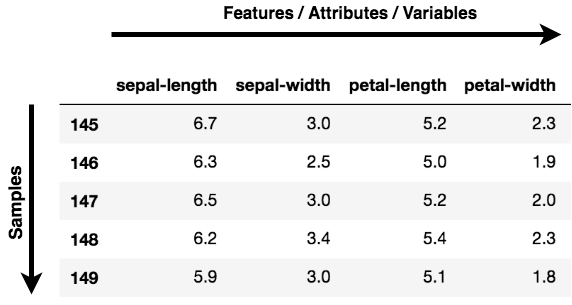

# **¿Dónde se puede aplicar PCA?**

* **Visualización de datos :** cuando se trabaja en cualquier problema relacionado con datos, el desafío en el mundo actual es el gran volumen de datos y las variables/características que definen esos datos. Para resolver un problema en el que los datos son la clave, se necesita una exploración exhaustiva de los datos, como descubrir cómo se correlacionan las variables o comprender la distribución de algunas variables. Teniendo en cuenta que existe una gran cantidad de variables o dimensiones a lo largo de las cuales se distribuyen los datos, la visualización puede ser un desafío y casi imposible.

Por lo tanto, PCA puede hacerlo por usted, ya que proyecta los datos en una dimensión inferior, lo que le permite visualizar los datos en un espacio 2D o 3D a simple vista.

* **Acelerar un algoritmo de aprendizaje automático (ML) :** dado que la idea principal de PCA es la reducción de dimensionalidad, puede aprovechar eso para acelerar el tiempo de entrenamiento y prueba de su algoritmo de aprendizaje automático considerando que sus datos tienen muchas características y que el aprendizaje del algoritmo ML es demasiado lento. .

A un nivel abstracto, se toma un conjunto de datos que tiene muchas características y se simplifica ese conjunto de datos seleccionando algunas Principal Componentsde las características originales.

# **¿Qué es un componente principal?**
Los componentes principales son la clave del PCA; representan lo que hay debajo del capó de sus datos. En términos sencillos, cuando los datos se proyectan a una dimensión inferior (supongamos tres dimensiones) desde un espacio superior, las tres dimensiones no son más que los tres componentes principales que capturan (o retienen) la mayor parte de la varianza (información) de sus datos. .

Los componentes principales tienen dirección y magnitud. La dirección representa a través de qué ejes principales los datos se distribuyen principalmente o tienen mayor variación y la magnitud significa la cantidad de variación que el componente principal captura de los datos cuando se proyecta sobre ese eje. Los componentes principales son una línea recta y el primer componente principal tiene la mayor variación en los datos. Cada componente principal posterior es ortogonal al último y tiene una varianza menor. De esta manera, dado un conjunto de x variables correlacionadas sobre y muestras, se logra un conjunto de u componentes principales no correlacionados sobre las mismas y muestras.

La razón por la que se obtienen componentes principales no correlacionados a partir de las funciones originales es que las funciones correlacionadas contribuyen al mismo componente principal, reduciendo así las funciones de datos originales a componentes principales no correlacionados; cada uno representa un conjunto diferente de características correlacionadas con diferentes cantidades de variación.

Cada componente principal representa un porcentaje de la variación total capturada de los datos.

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np

# Cargamos la base de datos

In [2]:
breast = load_breast_cancer()

In [3]:
breast

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
breast_data = breast.data

In [5]:
breast_data.shape

(569, 30)

In [6]:
breast_labels = breast.target

In [7]:
breast_labels.shape

(569,)

In [8]:
breast_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
labels = np.reshape(breast_labels,(569,1))

In [10]:
breast_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [12]:
final_breast_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [13]:
import pandas as pd
breast_dataset = pd.DataFrame(final_breast_data)

In [14]:
features = breast.feature_names

In [15]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
features_labels = np.append(features,'label')

In [17]:
breast_dataset.columns = features_labels

In [18]:
breast_dataset.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  label  
0          0.4601                  0.11890    0.0  
1          0.2750                  0.08902    0.0  
2          0.3613                  0.08758    0.0  
3          0.6638                  0.17300    0.0  
4          0.2364                  0.07678    0.0  

[5 rows x 31 columns]

In [19]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [20]:
breast_dataset.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension      label  
564                0.2216          0.2060                  0.07115     Benign  
565                0.1628          0.2572                  0.06637     Benign  
566                0.1418          0.2218                  0.07820     Benign  
567                0.2650          0.4087                  0.12400     Benign  
568                0.0000          0.2871                  0.07039  Malignant  

[5 rows x 31 columns]

# **Visualizando los datos del cáncer de mama**
Se comienza por Standardizinglos datos, ya que la salida de PCA se ve influenciada en función de la escala de las características de los datos.

Es una práctica común normalizar sus datos antes de enviarlos a cualquier algoritmo de aprendizaje automático.

Para aplicar la normalización, importará StandardScalerel módulo de la biblioteca sklearn y seleccionará solo las funciones que breast_datasetcreó en el paso de Exploración de datos. Una vez que tenga las funciones, aplicará la escala basándose fit_transformen los datos de las funciones.

Al aplicar StandardScaler, cada característica de sus datos debe distribuirse normalmente de modo que escale la distribución a una media de cero y una desviación estándar de uno.

In [21]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [22]:
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [23]:
x.shape

(569, 30)

In [24]:
np.mean(x),np.std(x)

(-6.118909323768877e-16, 1.0)

In [25]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [26]:
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21',
 'feature22',
 'feature23',
 'feature24',
 'feature25',
 'feature26',
 'feature27',
 'feature28',
 'feature29']

In [27]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)

In [28]:
normalised_breast.tail()

feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
564  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

     feature7  feature8  feature9  ...  feature20  feature21  feature22  \
564  2.320965 -0.312589 -0.931027  ...   1.901185   0.117700   1.752563   
565  1.263669 -0.217664 -1.058611  ...   1.536720   2.047399   1.421940   
566  0.105777 -0.809117 -0.895587  ...   0.561361   1.374854   0.579001   
567  2.658866  2.137194  1.043695  ...   1.961239   2.237926   2.303601   
568 -1.261820 -0.820070 -0.561032  ...  -1.410893   0.764190  -1.432735   

     feature23  feature24  feature25  feature26  feature27  feature28  \
564   2.015301   0.378365  -0.273318   0.664512   1.629151  -1.360158   
565   1.494959  -0.691230  -0.394820   0.236573   0.733827  -0.531855   
566   0.427906  -0.809587   0.350735   0.326767   0.414069  -1.104549   
567   1.653171   1.430427   3.904848   3.197605   2.289985   1.919083   
568  -1.075813  -1.859019  -1.207552  -1.305831  -1.745063  -0.048138   

     feature29  
564  -0.709091  
565  -0.973978  
566  -0.318409  
567   2.219635  
568  -0.751207  

[5 rows x 30 columns]

Ahora viene la parte crítica: las próximas líneas de código proyectarán los datos de treinta dimensiones del cáncer de mama a dos dimensiones principal components.

Utilizará la biblioteca sklearn para importar el PCAmódulo y, en el método PCA, pasará la cantidad de componentes (n_components=2) y finalmente llamará a fit_transform en los datos agregados. Aquí, varios componentes representan la dimensión inferior en la que proyectará los datos de su dimensión superior.

In [29]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=3)
principalComponents_breast = pca_breast.fit_transform(x)

In [30]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [31]:
principal_breast_Df.tail()

principal component 1  principal component 2  principal component 3
564               6.439315              -3.576818               2.459482
565               3.793382              -3.584048               2.088476
566               1.256179              -1.902297               0.562733
567              10.374794               1.672010              -1.877028
568              -5.475243              -0.670637               1.490434

Una vez que tenga los componentes principales, podrá encontrar el archivo explained_variance_ratio. Le proporcionará la cantidad de información o variación que contiene cada componente principal después de proyectar los datos a un subespacio de menor dimensión.

In [32]:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


Del resultado anterior, se puede observar que principal component 1contiene el 44,2% de la información, mientras que principal component 2solo contiene el 19% de la información. Además, el otro punto a tener en cuenta es que al proyectar datos de treinta dimensiones a datos de dos dimensiones, se perdió el 36,8% de la información.

Tracemos la visualización de las 569 muestras a lo largo del eje principal component - 1y principal component - 2. Debería brindarle una buena idea de cómo se distribuyen sus muestras entre las dos clases.

<Figure size 640x480 with 0 Axes>

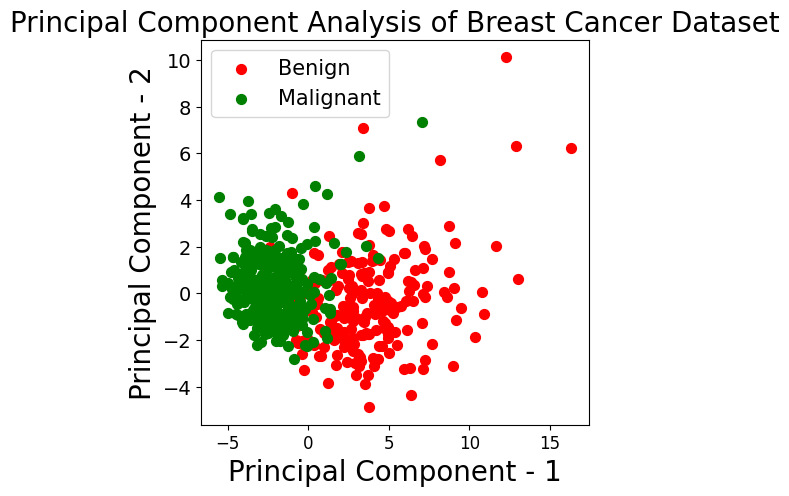

In [33]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(5,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 3'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
